# Iris Dataset (Multiclass Classification)
Multiclass classification problem using the Iris dataset.  
The Iris dataset is a classic and very easy multi-class classification dataset.  
https://www.kaggle.com/datasets/vikrishnan/iris-dataset

In [41]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from neural_network.functions.activation_functions import Softmax
from neural_network.functions.loss_functions import CrossEntropyLoss

from neural_network.neural_network import NeuralNetwork

import matplotlib.pyplot as plt

from tqdm.auto import tqdm

## Step 1: Load the data

In [42]:
# Create the dataframe and view it

df = pd.read_csv('./data/iris.data.csv')

In [43]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Step 2: Preprocess the data

In [45]:
# Split the data into data and target
data = df.drop('Iris-setosa', axis=1)
target = df['Iris-setosa']

# Encode the target
label_encoder = LabelEncoder().fit(target)
target = label_encoder.transform(target)

# One-hot encode the target
target = pd.get_dummies(target, dtype=float)

# Convert to numpy arrays
data = data.to_numpy()
target = target.to_numpy()

In [46]:
print('Data Shape:', data.shape)
print('Target Shape:', target.shape)

print('data[0]:', data[0])
print('target[0]:', target[0])

Data Shape: (149, 4)
Target Shape: (149, 3)
data[0]: [4.9 3.  1.4 0.2]
target[0]: [1. 0. 0.]


In [47]:
# Check for missing values
print('Missing values in data:', pd.isnull(data).sum().sum())
print('Missing values in target:', pd.isnull(target).sum().sum())

Missing values in data: 0
Missing values in target: 0


In [48]:
# Standardize the data
scaler = StandardScaler().fit(data)
data = scaler.transform(data)

print('data[0]:', data[0])

data[0]: [-1.1483555  -0.11805969 -1.35396443 -1.32506301]


In [49]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(target, test_size=0.2, random_state=42)

## Step 3: Create the Model
The model will output an array of probabilities for each class.

In [50]:
# Choose model hyperparameters
layer_sizes = [data.shape[1], target.shape[1]]
activations = [Softmax()]  # Softmax for multiclass classification
loss_function = CrossEntropyLoss()  # Cross-entropy loss for multiclass classification

# Create the model
model = NeuralNetwork(layer_sizes, activations, loss_function)

## Step 4: Train the Model

In [51]:
# Choose training hyperparameters
learning_rate = 0.01
regularization_rate = 0.01
momentum = 0.9
epochs = 100

In [52]:
# Store loss and accuracy for visualization
train_loss, test_loss = [], []
train_accuracy, test_accuracy = [], []

# Training loop
for epoch in tqdm(range(epochs)):
    # Train Data
    train_loss_val, train_correct_count = 0, 0

    for x, y in zip(X_train, y_train):
        # Forward pass
        y_pred = model.forward(x)

        # Calculate loss
        loss = model.get_loss(y, y_pred)
        train_loss_val += loss

        # Calculate accuracy
        train_correct_count += int(y.argmax() == y_pred.argmax())

        # Backward pass
        model.backward(y)

        # Update weights
        model.apply_gradients(learning_rate, regularization_rate, momentum)

    # Calculate average loss and accuracy
    train_loss.append(train_loss_val / len(X_train))
    train_accuracy.append(train_correct_count / len(X_train))

    # Test Data
    test_loss_val, test_correct_count = 0, 0

    for x, y in zip(X_test, y_test):
        # Forward pass
        y_pred = model.forward(x, learn=False)

        # Calculate loss
        loss = model.get_loss(y, y_pred)
        test_loss_val += loss

        # Calculate accuracy
        test_correct_count += int(y.argmax() == y_pred.argmax())

    # Calculate average loss and accuracy
    test_loss.append(test_loss_val / len(X_test))
    test_accuracy.append(test_correct_count / len(X_test))

    # Print epoch results
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch {epoch + 1} --- Train Loss: {train_loss[-1]:.4f}, Test Loss: {test_loss[-1]:.4f}, Train Accuracy: {train_accuracy[-1]:.4f}, Test Accuracy: {test_accuracy[-1]:.4f}')

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1 --- Train Loss: 0.6946, Test Loss: 0.6343, Train Accuracy: 0.8403, Test Accuracy: 0.9000
Epoch 10 --- Train Loss: 0.1935, Test Loss: 1.8794, Train Accuracy: 0.9916, Test Accuracy: 0.9000
Epoch 20 --- Train Loss: 0.8875, Test Loss: 3.0701, Train Accuracy: 0.9496, Test Accuracy: 0.8667
Epoch 30 --- Train Loss: 0.5789, Test Loss: 2.3026, Train Accuracy: 0.9748, Test Accuracy: 0.9000
Epoch 40 --- Train Loss: 0.7740, Test Loss: 2.3026, Train Accuracy: 0.9664, Test Accuracy: 0.9000
Epoch 50 --- Train Loss: 0.7740, Test Loss: 1.5351, Train Accuracy: 0.9664, Test Accuracy: 0.9333
Epoch 60 --- Train Loss: 0.7740, Test Loss: 0.8442, Train Accuracy: 0.9664, Test Accuracy: 0.9333
Epoch 70 --- Train Loss: 0.7740, Test Loss: 1.5351, Train Accuracy: 0.9664, Test Accuracy: 0.9333
Epoch 80 --- Train Loss: 0.9675, Test Loss: 1.5351, Train Accuracy: 0.9580, Test Accuracy: 0.9333
Epoch 90 --- Train Loss: 1.1610, Test Loss: 0.7675, Train Accuracy: 0.9496, Test Accuracy: 0.9667
Epoch 100 --- Train L

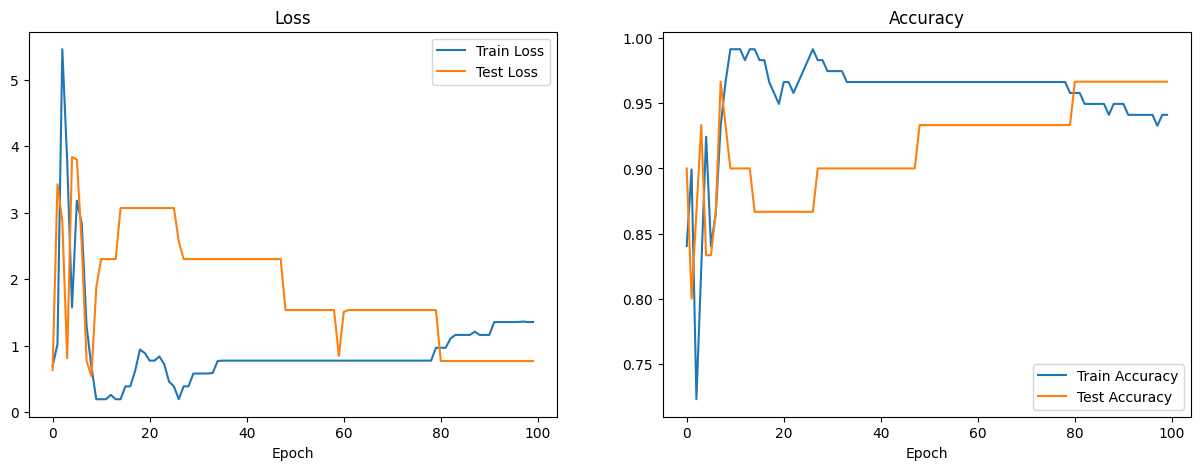

In [53]:
# Plot the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Loss
ax[0].plot(train_loss, label='Train Loss')
ax[0].plot(test_loss, label='Test Loss')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Accuracy
ax[1].plot(train_accuracy, label='Train Accuracy')
ax[1].plot(test_accuracy, label='Test Accuracy')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()